In [1]:

import pandas as pd
import numpy as np



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientist97/job-placement-simple-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/job-placement-simple-dataset


In [10]:
data = pd.read_csv('/kaggle/input/job-placement-simple-dataset/placement.csv')
data.head()


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [11]:
X = data.drop("placed", axis=1)
y = data['placed']

X.fillna(X.mean(), inplace = True)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(eta0=0.1, max_iter=100, random_state=42)
perceptron.fit(X_train, y_train)


Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.93
Confusion Matrix:
 [[11  0]
 [ 2 17]]


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 0.89
F1 Score: 0.94


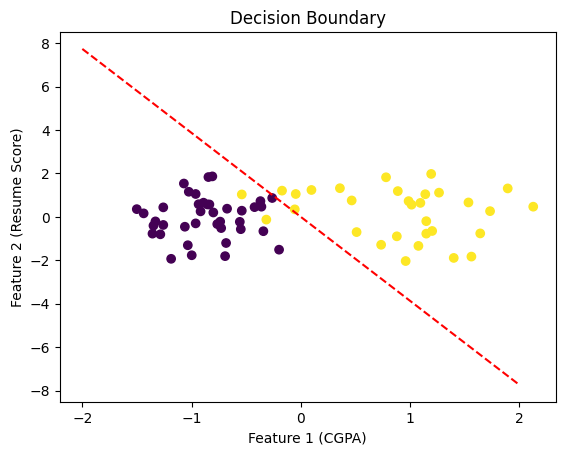

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')


# Plot decision boundary
w = perceptron.coef_[0]
b = perceptron.intercept_[0]
x_vals = np.linspace(-2, 2)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'r--')

plt.xlabel('Feature 1 (CGPA)')
plt.ylabel('Feature 2 (Resume Score)')
plt.title('Decision Boundary')
plt.show()
